In [3]:
0.6 * (0.1 / 0.6) * (0.3 / 0.6) * (0.2 / 0.6) * (0.1 / 0.6)

0.0027777777777777788

In [4]:
0.4 * 0.2 * 0.1 * 0.3 * 0.2 / 0.4 ** 4

0.018750000000000003

In [5]:
(20 / 14) ** 3 * (9/20) * (2/20) * (4/20) * (2/20)

0.002623906705539359

In [6]:
(3 / 20) * (2/20) * (1/20) * (2/20) * (20 / 3) ** 3

0.02222222222222223

In [7]:
import numpy as np # type: ignore

In [17]:
lengths = np.array([1.4, 1, 1.3, 1.9, 2, 1.8, 3, 3.8, 4.1, 3.9, 4.2, 3.4])

In [18]:
labels = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [39]:
len_0 = lengths[labels==0]
print(np.mean(len_0))
print(np.var(len_0))

1.5666666666666667
0.1288888888888889


In [40]:
len_1 = lengths[labels==1]
print(np.mean(len_1))
print(np.var(len_1))

3.733333333333333
0.1722222222222222


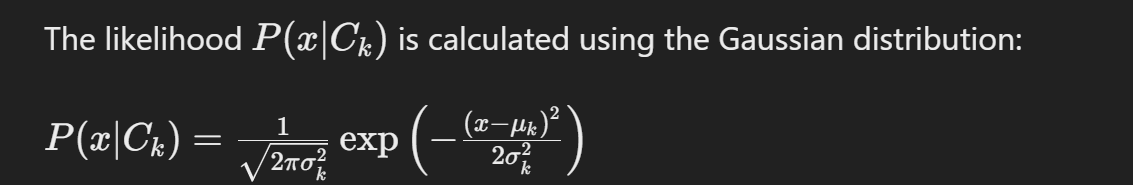

In [43]:
def gauss_likelihood(x, mean, var):
  return np.exp(-0.5 * (x - mean)**2 / var) / np.sqrt(2 * np.pi * var)

In [46]:
gauss_likelihood(3.4, np.mean(len_0), np.var(len_0)) * 0.5

1.2080820590230545e-06

In [47]:
gauss_likelihood(3.4, np.mean(len_1), np.var(len_1)) * 0.5

0.34812922367906424

In [48]:
def create_train_data():
  data =  [['Sunny', 'Hot', 'High', 'Weak', 'no'],
 ['Sunny', 'Hot', 'High', 'Strong', 'no'],
 ['Overcast', 'Hot', 'High', 'Weak', 'yes'],
 ['Rain', 'Mild', 'High', 'Weak', 'yes'],
 ['Rain', 'Cool', 'Normal', 'Weak', 'yes'],
 ['Rain', 'Cool', 'Normal', 'Strong', 'no'],
 ['Overcast', 'Cool', 'Normal', 'Strong', 'yes'],
 ['Overcast', 'Mild', 'High', 'Weak', 'no'],
 ['Sunny', 'Cool', 'Normal', 'Weak', 'yes'],
 ['Rain', 'Mild', 'Normal', 'Weak', 'yes']]
  return np.array(data)

train_data = create_train_data()

In [50]:
def compute_prior_probabilities(train_data):
  y_unique = ['no', 'yes']
  prior_prob = np.zeros(len(y_unique))
  for i, label in enumerate(y_unique):
    prior_prob[i] = np.sum(train_data[:, -1] == label) / len(train_data)
  return prior_prob

prior_prob = compute_prior_probabilities(train_data)
prior_prob

array([0.4, 0.6])

In [59]:
def compute_conditional_probabilities(train_data):
  y_unique = ['no', 'yes']
  conditional_prob = []
  list_x_name = []

  for i in range(0, train_data.shape[1] - 1):
    x_unique = np.unique(train_data[:, i])
    list_x_name.append(x_unique)
    x_conditional_prob = np.zeros((len(y_unique), len(x_unique)))
    for j, label in enumerate(y_unique):
      for k, x_name in enumerate(x_unique):
        x_conditional_prob[j, k] = np.sum((train_data[:, i] == x_name) & (train_data[:, -1] == label)) / np.sum(train_data[:, -1] == label)
    conditional_prob.append(x_conditional_prob)
  return conditional_prob, list_x_name


conditional_prob, list_x_name = compute_conditional_probabilities(train_data)
list_x_name

[array(['Overcast', 'Rain', 'Sunny'], dtype='<U8'),
 array(['Cool', 'Hot', 'Mild'], dtype='<U8'),
 array(['High', 'Normal'], dtype='<U8'),
 array(['Strong', 'Weak'], dtype='<U8')]

In [56]:
def get_index_from_value(feature_name, list_features):
  return np.where(list_features == feature_name)[0][0]


In [57]:
outlook = list_x_name[0]
i1 = get_index_from_value("Overcast", outlook)
i2 = get_index_from_value("Rain", outlook)
i3 = get_index_from_value("Sunny", outlook)

In [58]:
print(i1, i2, i3)

0 1 2


In [60]:
x1 = get_index_from_value("Sunny",list_x_name[0])
print("P(’Outlook’=’Sunny’|Play Tennis’=’Yes’) = ", np.round(conditional_prob[0][1, x1],2))

P(’Outlook’=’Sunny’|Play Tennis’=’Yes’) =  0.17


In [61]:
print("P(’Outlook’=’Sunny’|Play Tennis’=’No’) = ", np.round(conditional_prob[0][0, x1],2))

P(’Outlook’=’Sunny’|Play Tennis’=’No’) =  0.5


In [62]:
conditional_prob

[array([[0.25      , 0.25      , 0.5       ],
        [0.33333333, 0.5       , 0.16666667]]),
 array([[0.25      , 0.5       , 0.25      ],
        [0.5       , 0.16666667, 0.33333333]]),
 array([[0.75      , 0.25      ],
        [0.33333333, 0.66666667]]),
 array([[0.5       , 0.5       ],
        [0.16666667, 0.83333333]])]

In [64]:
def train_naive_bayes(train_data):
  prior_prob = compute_prior_probabilities(train_data)
  conditional_prob, list_x_name = compute_conditional_probabilities(train_data)
  return prior_prob, conditional_prob, list_x_name

In [63]:
def prediction_play_tennis(X, list_x_name, prior_prob, conditional_prob):
  x0 = get_index_from_value(X[0], list_x_name[0])
  x1 = get_index_from_value(X[1], list_x_name[1])
  x2 = get_index_from_value(X[2], list_x_name[2])
  x3 = get_index_from_value(X[3], list_x_name[3])

  p0 = prior_prob[0] * conditional_prob[0][0, x0] * conditional_prob[1][0, x1] * conditional_prob[2][0, x2] * conditional_prob[3][0, x3]
  p1 = prior_prob[1] * conditional_prob[0][1, x0] * conditional_prob[1][1, x1] * conditional_prob[2][1, x2] * conditional_prob[3][1, x3]
  return 0 if p0 > p1 else 1

In [66]:
X = ['Sunny', 'Cool', 'High', 'Strong']
data = create_train_data()
prior_prob, conditional_prob, list_x_name = train_naive_bayes(data)
pred = prediction_play_tennis(X, list_x_name, prior_prob, conditional_prob)

In [67]:
if pred:
  print("Ad should go")
else:
  print("Ad should not go")

Ad should not go


# Iris prediction

In [74]:
import pandas as pd # type: ignore
#read data from .txt file
def create_data_iris():
  data = pd.read_csv('iris.data.txt').to_numpy()
  return data


In [76]:
def compute_prior_probabilities(train_data):
  y_unique = np.unique(train_data[:, -1])
  prior_prob = np.zeros(len(y_unique))
  for i, label in enumerate(y_unique):
    prior_prob[i] = np.sum(train_data[:, -1] == label) / len(train_data)
  return prior_prob

In [90]:
def gauss_likelihood(x, mean, var):
  return np.exp(-0.5 * (x - mean)**2 / var) / np.sqrt(2 * np.pi * var)

def predict_iris(X, train_data, prior_prob):
  y_unique = np.unique(train_data[:, -1])
  mean = np.zeros((len(y_unique), train_data.shape[1] - 1))
  var = np.zeros((len(y_unique), train_data.shape[1] - 1))
  predictions = np.zeros((len(y_unique), len(X)))
  for i in range(train_data.shape[1] - 1):
    for j, label in enumerate(y_unique):
      mean[j, i] = np.mean(train_data[train_data[:, -1] == label, i])
      var[j, i] = np.var(train_data[train_data[:, -1] == label, i])
      predictions[j, i] = gauss_likelihood(X[i], mean[j, i], var[j, i])

  predictions = np.prod(predictions, axis=1) * prior_prob
  print(predictions)
  return np.argmax(predictions)


In [91]:
X = [6.3 , 3.3, 6.0, 2.5]
train_data = create_data_iris()
y_unique = np.unique(train_data[:,4])
prior_probability = compute_prior_probabilities(train_data)
pred = y_unique[predict_iris(X, train_data, prior_probability)]
assert pred == "Iris-virginica"

[2.56995292e-248 1.51223344e-012 2.38004540e-002]


In [92]:
X = [5.0,2.0,3.5,1.0]
train_data = create_data_iris()
y_unique = np.unique(train_data[:,4])
prior_probability = compute_prior_probabilities(train_data)
pred = y_unique[predict_iris(X, train_data, prior_probability)]
assert pred ==  "Iris-versicolor"

[5.83759156e-44 3.34856265e-04 7.87140624e-11]


In [93]:
X = [4.9,3.1,1.5,0.1]
train_data = create_data_iris()
y_unique = np.unique(train_data[:,4])
prior_probability = compute_prior_probabilities(train_data)
pred = y_unique[predict_iris(X, train_data, prior_probability)]
assert pred ==   "Iris-setosa"

[8.89966376e-01 2.95981267e-18 1.04396439e-25]


In [89]:
pred

'Iris-setosa'